In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [2]:
df_train=pd.read_excel('Data_Train.xlsx')
df_test=pd.read_excel('Data_Test.xlsx')

In [3]:
df_train.shape

(12690, 9)

In [4]:
df_test.shape

(4231, 8)

In [5]:
df_train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [6]:
df_test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,NaN,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,NaN,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          11687 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [8]:
df_train.isnull().sum()

TITLE            1003
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

We can see that there are many null values in the dataset.

In [9]:
df_train.duplicated().sum()

25

In [10]:
df_test.duplicated().sum()

1

In [11]:
df_train=df_train.drop_duplicates()
df_train.duplicated().sum()

0

In [12]:
df_test=df_test.drop_duplicates()
df_test.duplicated().sum()

0

We can see that the duplicate values are dropped.

In [14]:
df=pd.concat([df_train,df_test], ignore_index=True)

In [15]:
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0
...,...,...,...,...,...,...,...,...,...
16890,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,NaN
16891,NaN,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,NaN
16892,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,NaN
16893,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,NaN


In [16]:
df.shape

(16895, 9)

In [17]:
df['CITY'].fillna('Missing', inplace=True)  
df['LOCALITY'].fillna('Missing', inplace=True)  
df['RATING'].fillna(3.8, inplace=True)  
df['VOTES'].fillna(0.0, inplace=True) 
df['TITLE'].fillna('Unknown',inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16895 entries, 0 to 16894
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          16895 non-null  object 
 1   RESTAURANT_ID  16895 non-null  int64  
 2   CUISINES       16895 non-null  object 
 3   TIME           16895 non-null  object 
 4   CITY           16895 non-null  object 
 5   LOCALITY       16895 non-null  object 
 6   RATING         16895 non-null  object 
 7   VOTES          16895 non-null  object 
 8   COST           12665 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.2+ MB


In [19]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY                0
LOCALITY            0
RATING              0
VOTES               0
COST             4230
dtype: int64

<Axes: >

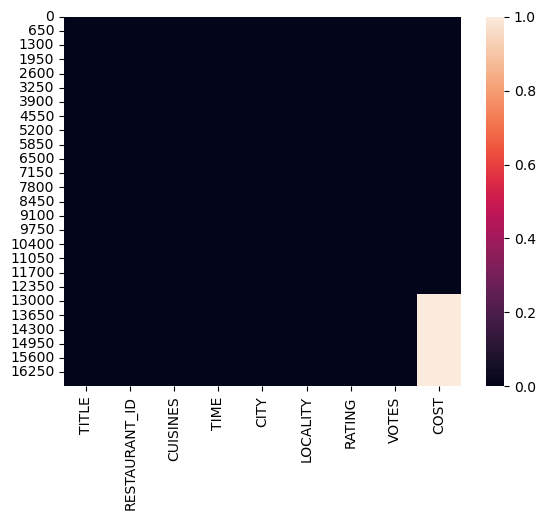

In [20]:
sns.heatmap(df.isnull())

In [21]:
df.describe()

,RESTAURANT_ID,COST
count,16895.000000,12665.000000
mean,7765.922344,655.400790
std,4494.226728,627.389831
min,0.000000,20.000000
25%,3869.500000,300.000000
50%,7750.000000,500.000000
75%,11672.000000,800.000000
max,15573.000000,14000.000000


<Axes: xlabel='COST', ylabel='Density'>

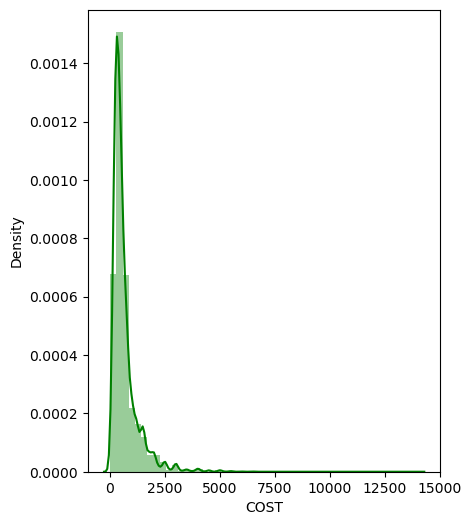

In [22]:
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
sns.distplot(df['COST'], color = 'g')

In [26]:
df.shape

(16895, 9)

In [31]:
label_encoder = LabelEncoder()
df['CUISINES'] = label_encoder.fit_transform(df['CUISINES'])
df['TIME'] = label_encoder.fit_transform(df['TIME'])
df['CITY']=label_encoder.fit_transform(df['CITY'])
df['LOCALITY']=label_encoder.fit_transform(df['LOCALITY'])
df.drop('TITLE',inplace=True,axis=1)
df.drop('VOTES',inplace=True)

KeyError: "['TITLE'] not found in axis"

Dividing the data back into the datasets:

In [28]:
df_train=df[df['COST'].isnull()!=True]
df_test=df[df['COST'].isnull()==True]
df_test.drop('COST', axis=1, inplace=True)

In [29]:
x=df_train.drop(labels=['COST'], axis=1)
y=df_train['COST'].values

Finding the best random state:

In [30]:
#finding the best random state
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score: ",maxAccu," on random state ",maxRS)

ValueError: could not convert string to float: '-'

Splitting into training data and testing data:

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=maxRS)

Linear Regression:

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
predtrain=lr.predict(x_train)
print(lr)
print('R2 Score: ',r2_score(y_test,predlr))
print('R2 Score on training data: ',r2_score(y_train,predtrain))
print('Mean Absolute Error: ',mean_absolute_error(y_test,predlr))
print('Mean Squared Error: ',mean_squared_error(y_test,predlr))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,predlr)))

Random Forest Regression:

In [ ]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
predrfr=rfr.predict(x_test)
predtrain=rfr.predict(x_train)
print(rfr)
print('R2 Score: ',r2_score(y_test,predrfr))
print('R2 Score on training data: ',r2_score(y_train,predtrain))
print('Mean Absolute Error: ',mean_absolute_error(y_test,predrfr))
print('Mean Squared Error: ',mean_squared_error(y_test,predrfr))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,predrfr)))

Decision Tree Regressor:

In [ ]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
predtrain=dtr.predict(x_train)
print(dtr)
print('R2 Score: ',r2_score(y_test,preddtr))
print('R2 Score on training data: ',r2_score(y_train,predtrain))
print('Mean Absolute Error: ',mean_absolute_error(y_test,preddtr))
print('Mean Squared Error: ',mean_squared_error(y_test,preddtr))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,preddtr)))

KNeighbour Regressor:

In [ ]:
knn=KNN()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
predtrain=knn.predict(x_train)
print(knn)
print('R2 Score: ',r2_score(y_test,predknn))
print('R2 Score on training data: ',r2_score(y_train,predtrain))
print('Mean Absolute Error: ',mean_absolute_error(y_test,predknn))
print('Mean Squared Error: ',mean_squared_error(y_test,predknn))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,predknn)))

Lasso:

In [ ]:
l=Lasso()
l.fit(x_train,y_train)
predl=l.predict(x_test)
predtrain=l.predict(x_train)
print(l)
print('R2 Score: ',r2_score(y_test,predl))
print('R2 Score on training data: ',r2_score(y_train,predtrain))
print('Mean Absolute Error: ',mean_absolute_error(y_test,predl))
print('Mean Squared Error: ',mean_squared_error(y_test,predl))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,predl)))

Ridge:

In [ ]:
r=Ridge()
r.fit(x_train,y_train)
predr=r.predict(x_test)
predtrain=r.predict(x_train)
print(r)
print('R2 Score: ',r2_score(y_test,predr))
print('R2 Score on training data: ',r2_score(y_train,predtrain))
print('Mean Absolute Error: ',mean_absolute_error(y_test,predr))
print('Mean Squared Error: ',mean_squared_error(y_test,predr))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,predr)))

Support Vector Regression:

In [ ]:
s=SVR()
s.fit(x_train,y_train)
preds=s.predict(x_test)
predtrain=s.predict(x_train)
print(s)
print('R2 Score: ',r2_score(y_test,preds))
print('R2 Score on training data: ',r2_score(y_train,predtrain))
print('Mean Absolute Error: ',mean_absolute_error(y_test,preds))
print('Mean Squared Error: ',mean_squared_error(y_test,preds))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,preds)))

Gradient Boosting Regressor:

In [ ]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
predgbr=gbr.predict(x_test)
predtrain=gbr.predict(x_train)
print(gbr)
print('R2 Score: ',r2_score(y_test,predgbr))
print('R2 Score on training data: ',r2_score(y_train,predtrain))
print('Mean Absolute Error: ',mean_absolute_error(y_test,predgbr))
print('Mean Squared Error: ',mean_squared_error(y_test,predgbr))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,predgbr)))